# Image Compression using PCA
#### In this project, we will be exploring the possibilities of Principal Component Analysis (PCA) for image compression. The dataset we will be looking at is from the MNIST database and comprises of hand-written digits. The dataset has 1000 images in the form of 28x28 pixels that can be represented using 784 elements. Let's get started and import our dataset.

In [116]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [155]:
# Load and preprocess the image without resizing
def load_gray_image(image_file_path):
    img = Image.open(image_file_path).convert('L')  # Convert to grayscale
    img_data = np.array(img)  # Keep the image as a 2D array
    return img_data

# Specify the image path
img_file_path = r"C:\Users\Abdul\OneDrive\Desktop\Collage\Fall 2024-2025\Ai361- Image Processing\Images\images small\12.jpg"
image_array = load_gray_image(img_file_path)  # Get the 2D image data
print(image_array.shape)

(2950, 3848)


Let's plot a random image to see what our dataset looks like

Lets compute the eigenvector and perform eigendecomposition on this dataset.

In [160]:
# Function to perform mean centering, calculate covariance matrix, and eigendecomposition
def pca_decomposition(image_data):
    # Mean centering (for standardization)
    mean_value = image_data.mean(axis=0)
    centered_data = image_data - mean_value  # Center the image by subtracting the mean

    # Covariance matrix calculation
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = (-eigenvalues).argsort()  # Sort indices in descending order
    eigenvalues = eigenvalues[sorted_indices].real
    eigenvectors = eigenvectors[:, sorted_indices].real

    return centered_data, eigenvalues, eigenvectors, mean_value

# Call the PCA decomposition function
centered_image_data, eigen_vals, eigen_vecs, mean_val = pca_decomposition(image_array)

# Output the shapes of eigenvalues and eigenvectors
print(eigen_vals.shape, eigen_vecs.shape)


(3848,) (3848, 3848)


Lets plot the first few eigenvectors to see the trend. These eigenvectors also represent the number of Principal Components

In [169]:
# Function to reconstruct the image using a subset of eigenvectors
def reconstruct_image(centered_data, eigenvectors, num_components, mean_value):
    # Select the specified number of principal components
    selected_weights = eigenvectors[:, :num_components]
    
    # Project the centered data onto the selected principal components
    projected_data = np.dot(centered_data, selected_weights)
    
    # Reconstruct the image by reversing the projection and adding the mean
    reconstructed = np.dot(projected_data, selected_weights.T) + mean_value
    
    return reconstructed

# Specify the number of principal components
num_components = 50

# Call the reconstruction function
reconstructed_image = reconstruct_image(centered_image, eigenvectors, num_components, mean_val)


As expected, the image becomes noisier as number of principal components increase. This is because the high number of Principal Components try to capture more variance from the dataset.

Next, we will contruct a function that will that takes an argument 'n'. This function will:
1. plot a random image from the data set
2. plot n number of incremental plots that reconstructs the original image

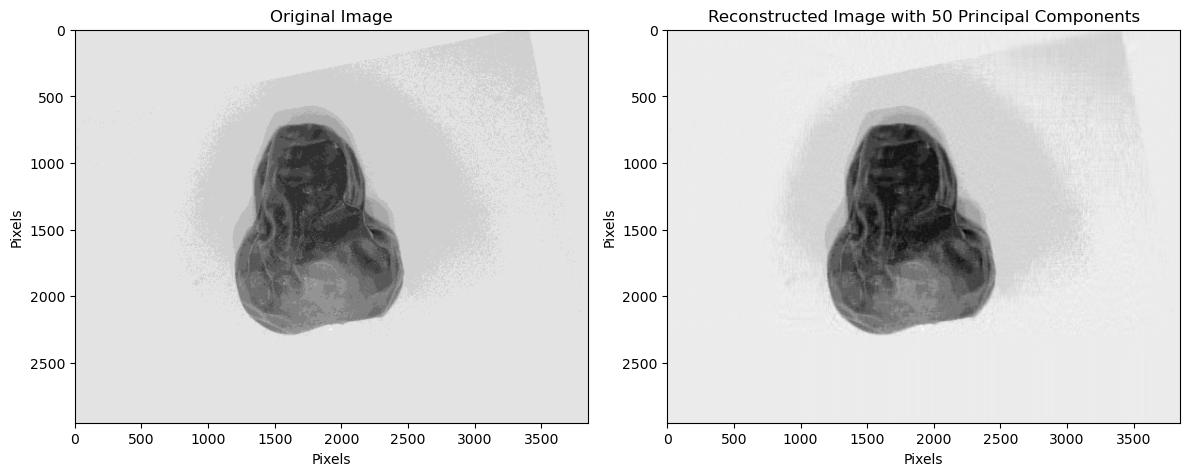

In [173]:
# Function to display the original and reconstructed images side by side
def display_images(original, reconstructed, components):
    # Create a new figure for plotting
    plt.figure(figsize=(12, 6))
    
    # Display the original image
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.xlabel("Pixels")
    plt.ylabel("Pixels")
    
    # Display the reconstructed image
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f"Reconstructed Image with {components} Principal Components")
    plt.xlabel("Pixels")
    plt.ylabel("Pixels")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Call the function to display the images with parameters
display_images(image_array, reconstructed_image, num_components)


We will now try different 'n' values until we can find an optimal value that can help us humanly distinguish the digits.

In [176]:
# Function to calculate and print compression ratios for different levels of PCA components
def calculate_compression_ratios(image_data, levels):
    total_elements_original = image_data.size  # Total number of elements in the original image

    for n in levels:
        # Calculate total elements in PCA representation
        total_elements_pca = (image_data.shape[0] * n) + (image_data.shape[1] * n)  
        compression_ratio = total_elements_original / total_elements_pca
        
        # Print the compression ratio
        print(f"The compression ratio for {n} components is {compression_ratio:.1f}")

# Specify the compression levels
compression_levels = [10, 20, 30, 40, 50, 60]

# Call the function to calculate and print compression ratios
calculate_compression_ratios(image_array, compression_levels)


The compression ratio for 10 components is 167.0
The compression ratio for 20 components is 83.5
The compression ratio for 30 components is 55.7
The compression ratio for 40 components is 41.7
The compression ratio for 50 components is 33.4
The compression ratio for 60 components is 27.8
